# Exploratory Data Analysis

### This file contains Task 2 upto Task 15

## Task 2

Let’s read the CSV file with some more analytical and statistical analysis like head(), describe() etc.

In [3]:
# importing all neccessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from scipy import stats
import warnings,os
import re



from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from subprocess import check_output
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mmter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# loading the dataset

df = pd.read_csv('Qoslaaye_All.csv')
df

,author,date,Comment,like_count,reply_count,comment_length
0,@user-yh1uk8ld5b,2024-04-11T05:01:10Z,Tareenka qoslaaye waa Nin aqoon u leh shaqadiisa,0,1,48
1,@user-yh1uk8ld5b,2024-04-11T05:01:48Z,Qareenka qoslaaye waa Nin shaqadiisa yaqaan,0,0,43
2,@najmabdullahi9952,2024-04-11T03:49:05Z,Qof kugu midib ah kugu dal ah kugu muslim ah😢😢...,0,0,181
3,@BisharAli-gk4qo,2024-04-11T03:17:25Z,Kiiskaan madmadow baa ku jira gacanta cida gay...,0,0,99
4,@BisharAli-gk4qo,2024-04-11T02:29:31Z,Iimaanka alle ka qaad aniga qoslaaye mahi in u...,0,0,66
...,...,...,...,...,...,...
1832,@khadragelle7801,2024-04-05T05:18:52Z,Waa la yaab al shabaab waa muslim ha hadho...,0,0,109
1833,@sultanlife5385,2024-04-05T05:02:44Z,It’s impossible to drink all those alcohol jus...,1,1,73
1834,@mukhtarhajji7265,2024-04-06T19:34:09Z,"Impossible and possible, have a two laters dif...",0,0,54
1835,@user-mk1ux6uu1p,2024-04-05T03:54:55Z,Waa ciyaal weero waxa kaa\nShaqeya laa maha am...,0,0,60


In [8]:
# checking the shape of the dataset
df.shape

(1837, 6)

In [7]:
# checking the columns of the dataset
df.columns

Index(['author', 'date', 'Comment', 'like_count', 'reply_count',
       'comment_length'],
      dtype='object')

In [9]:
# checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1837 entries, 0 to 1836
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   author          1837 non-null   object
 1   date            1837 non-null   object
 2   Comment         1837 non-null   object
 3   like_count      1837 non-null   int64 
 4   reply_count     1837 non-null   int64 
 5   comment_length  1837 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 86.2+ KB


In [12]:
# statistical summary

df.describe()

,like_count,reply_count,comment_length
count,1837.000000,1837.000000,1837.000000
mean,2.073489,0.208492,98.122482
std,9.442899,0.926242,103.404849
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,39.000000
50%,0.000000,0.000000,72.000000
75%,1.000000,0.000000,125.000000
max,255.000000,18.000000,1734.000000


## Task 3

Let’s clean the data by removing the extra data and outliers, dropping or filling the missing values, etc. Create the final dataframe for further analysis.

In [10]:
# checking for missing values
df.isnull().sum()

author            0
date              0
Comment           0
like_count        0
reply_count       0
comment_length    0
dtype: int64

In [11]:
df.isna().sum().sum()

0

In [13]:
# checking for duplicates

df.duplicated().sum().sum()

1

In [14]:
# dropping the duplicates

df.drop_duplicates(inplace=True)

In [15]:
# rechecking the duplicates

df.duplicated().sum().sum()

0

<Axes: ylabel='like_count'>

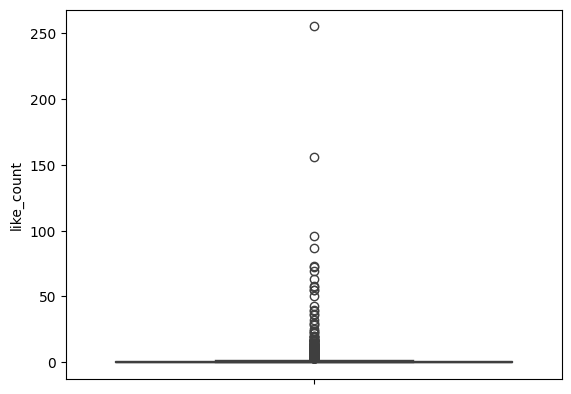

In [17]:
# checking for outliers

sns.boxplot(df['like_count'])

<Axes: ylabel='reply_count'>

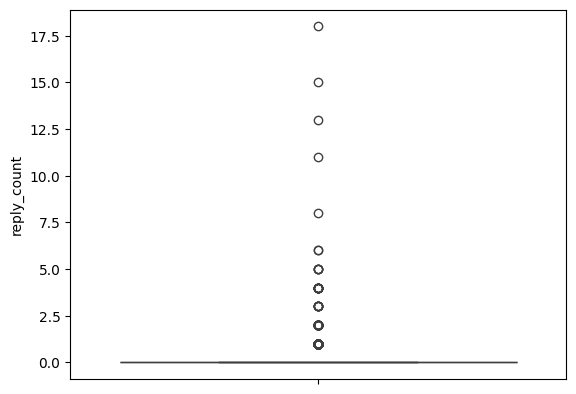

In [18]:
# checking for outliers

sns.boxplot(df['reply_count'])

<Axes: ylabel='comment_length'>

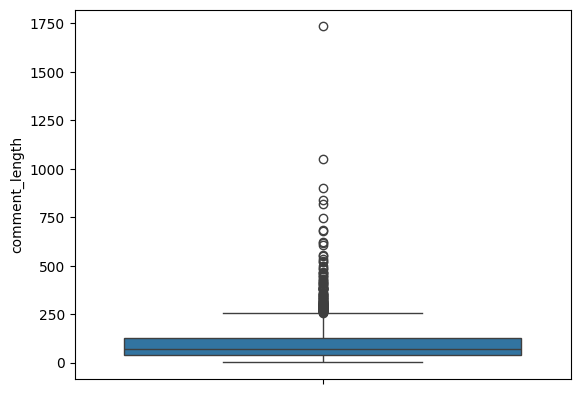

In [19]:
# checking for outliers

sns.boxplot(df['comment_length'])

Considering the nature of this dataset, the outliers are not removed.

## Task 4

Lets analyze and visualize the distribution of post (comment) length and word counts.

Calulating the word count and comment length for each post and visualizing the distribution of comment length and word counts.

In [21]:
# calculate the word count
df['word_count'] = df['Comment'].apply(lambda x: len(str(x).split()))

In [22]:
df

,author,date,Comment,like_count,reply_count,comment_length,word_count
0,@user-yh1uk8ld5b,2024-04-11T05:01:10Z,Tareenka qoslaaye waa Nin aqoon u leh shaqadiisa,0,1,48,8
1,@user-yh1uk8ld5b,2024-04-11T05:01:48Z,Qareenka qoslaaye waa Nin shaqadiisa yaqaan,0,0,43,6
2,@najmabdullahi9952,2024-04-11T03:49:05Z,Qof kugu midib ah kugu dal ah kugu muslim ah😢😢...,0,0,181,27
3,@BisharAli-gk4qo,2024-04-11T03:17:25Z,Kiiskaan madmadow baa ku jira gacanta cida gay...,0,0,99,18
4,@BisharAli-gk4qo,2024-04-11T02:29:31Z,Iimaanka alle ka qaad aniga qoslaaye mahi in u...,0,0,66,13
...,...,...,...,...,...,...,...
1832,@khadragelle7801,2024-04-05T05:18:52Z,Waa la yaab al shabaab waa muslim ha hadho...,0,0,109,18
1833,@sultanlife5385,2024-04-05T05:02:44Z,It’s impossible to drink all those alcohol jus...,1,1,73,13
1834,@mukhtarhajji7265,2024-04-06T19:34:09Z,"Impossible and possible, have a two laters dif...",0,0,54,8
1835,@user-mk1ux6uu1p,2024-04-05T03:54:55Z,Waa ciyaal weero waxa kaa\nShaqeya laa maha am...,0,0,60,10


In [24]:
# checking the summary of statistics

summary_stats = df[['comment_length', 'word_count']].describe()
summary_stats

,comment_length,word_count
count,1836.000000,1836.000000
mean,98.155773,15.517429
std,103.423174,16.455248
min,1.000000,1.000000
25%,39.000000,6.000000
50%,72.000000,11.000000
75%,125.000000,20.000000
max,1734.000000,282.000000


In [ ]:
Visualizing the distribution of post length and word counts

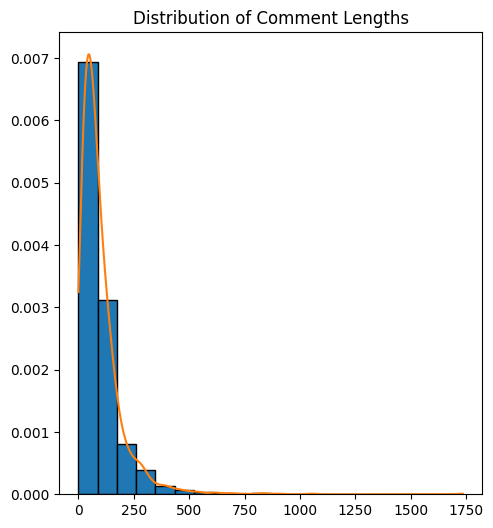

In [26]:
# Plot distribution of post lengths
plt.figure(figsize=(12, 6))

# 1 row, 2 columns, 1st subplot
plt.subplot(1, 2, 1)

# Plot histogram
plt.hist(df['comment_length'], bins=20, density=True, edgecolor='black')

# KDE plot
from scipy.stats import gaussian_kde
density = gaussian_kde(df['comment_length'])
x_vals = np.linspace(df['comment_length'].min(), df['comment_length'].max(), 1000)
plt.plot(x_vals, density(x_vals))

plt.title('Distribution of Comment Lengths')
plt.show()

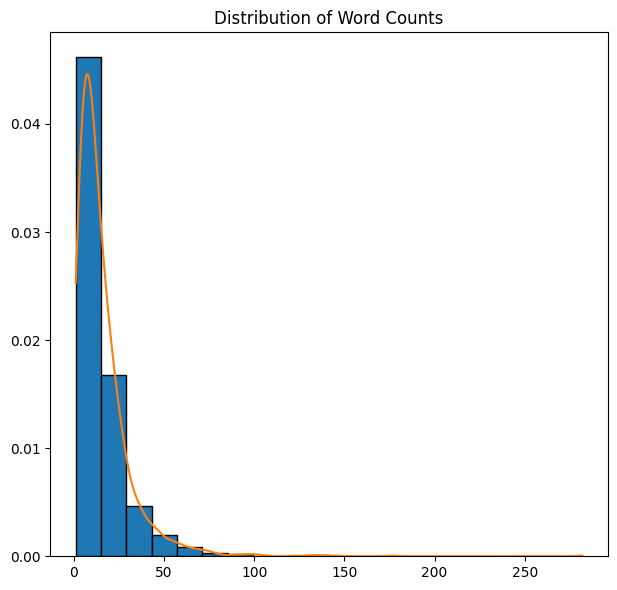

In [27]:
# Plot distribution of word counts
plt.figure(figsize=(12, 6))

# 1 row, 2 columns, 2nd subplot
plt.subplot(1, 2, 2)

# Plot histogram
plt.hist(df['word_count'], bins=20, density=True, edgecolor='black')

# KDE plot
from scipy.stats import gaussian_kde
density = gaussian_kde(df['word_count'])
x_vals = np.linspace(df['word_count'].min(), df['word_count'].max(), 1000)
plt.plot(x_vals, density(x_vals))

plt.title('Distribution of Word Counts')

plt.tight_layout()
plt.show()

## Task 5

Let's analyze and visualize the most trending posts (comments).

The most trending comments Sort by Likes and Get the Top 10

In [28]:
df.sort_values(by='like_count', ascending=False)[0:10]

,author,date,Comment,like_count,reply_count,comment_length,word_count
487,@aadamisports446,2024-04-04T15:46:34Z,Waxaan halkaan ka fahmeenaa in uu sare u kacay...,255,3,134,21
428,@user-vl6kp6ck5x,2024-04-04T16:40:27Z,Cameroyinka amaanka halagu badiyo caasimada ❤ ...,156,5,68,9
911,@Cadar49,2024-04-09T18:10:22Z,Libaan waa in lasoo qabtaa asgaa ugu danbi wee...,96,15,132,24
1071,@Aniga-qn9iv,2024-04-09T16:08:41Z,Dad Xamar jooga way adag tahay ama waqti badan...,87,18,96,17
992,@poom5180,2024-04-09T17:26:29Z,Shabakooyin kale ayaa jira ee sifiican halooga...,73,1,65,9
395,@dahirsabriye1904,2024-04-04T17:26:52Z,shuute guleyso iyo police ka somalia ❤💪,72,0,39,7
1446,@rocky4066,2024-04-04T15:16:32Z,Ciyyaal yaryar oo qabiil lagu keenay ayaa loo ...,69,8,71,12
444,@aliguleed6748,2024-04-04T16:26:14Z,Tuugadii oo dhan cctv ayaa cadeeyey Nisa ayaa ...,63,6,69,11
520,@sharmarkeahmed2864,2024-04-04T15:07:21Z,Hadii moorayaan askar laga dhigto waxas ayaa l...,58,2,62,10
468,@madaxsareofficial9520,2024-04-04T16:11:24Z,Gabigood hala wada toogto si dalka nabad u noq...,57,2,134,23


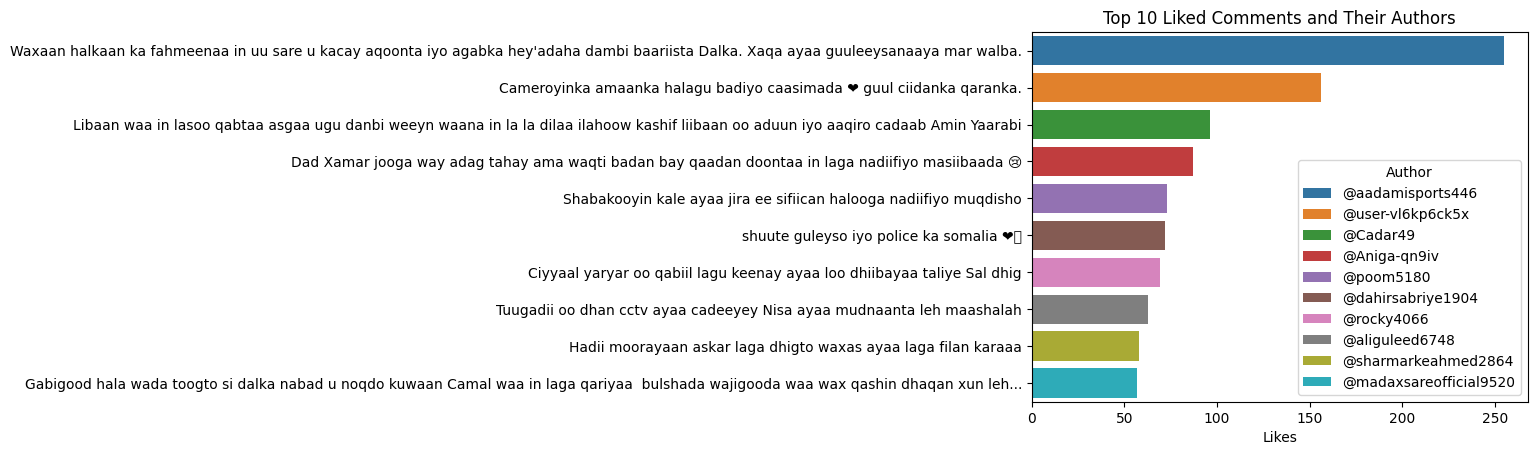

In [39]:
top_likes = df[['author', 'Comment', 'like_count']].sort_values(by='like_count', ascending=False).head(10)

sns.barplot(x='like_count', y='Comment', hue='author', dodge=False, data=top_likes)
plt.title('Top 10 Liked Comments and Their Authors')
plt.xlabel('Likes')
plt.ylabel('')
plt.legend(title='Author', loc='lower right')
plt.show()

The most trending comments Sort by replies and Get Top 10

In [35]:
df.sort_values(by='reply_count', ascending=False)[0:10]

,author,date,Comment,like_count,reply_count,comment_length,word_count
1071,@Aniga-qn9iv,2024-04-09T16:08:41Z,Dad Xamar jooga way adag tahay ama waqti badan...,87,18,96,17
911,@Cadar49,2024-04-09T18:10:22Z,Libaan waa in lasoo qabtaa asgaa ugu danbi wee...,96,15,132,24
502,@naciimasaciid3886,2024-04-04T15:33:18Z,Mahad salad io madax wayne xasan shiiq shaqo w...,55,13,98,16
869,@CoofavBulle-og5ld,2024-04-09T18:48:58Z,Qoslaaye\nLiibaan\nQoone \nseddexdaas nin hada...,14,11,112,17
1446,@rocky4066,2024-04-04T15:16:32Z,Ciyyaal yaryar oo qabiil lagu keenay ayaa loo ...,69,8,71,12
444,@aliguleed6748,2024-04-04T16:26:14Z,Tuugadii oo dhan cctv ayaa cadeeyey Nisa ayaa ...,63,6,69,11
1613,@user-pm7dk2tj5h,2024-04-06T23:13:28Z,Hada nin ayaa iga cunay4800dolar ninkas soomal...,0,6,679,122
1275,@ubahabdi2531,2024-04-05T08:51:58Z,Waa moryantii hawiye,1,5,20,3
1079,@fatouma-zahra1884,2024-04-09T16:06:56Z,Qoslayee iskagu horey xabsi u gaalay baa taliy...,5,5,95,17
428,@user-vl6kp6ck5x,2024-04-04T16:40:27Z,Cameroyinka amaanka halagu badiyo caasimada ❤ ...,156,5,68,9


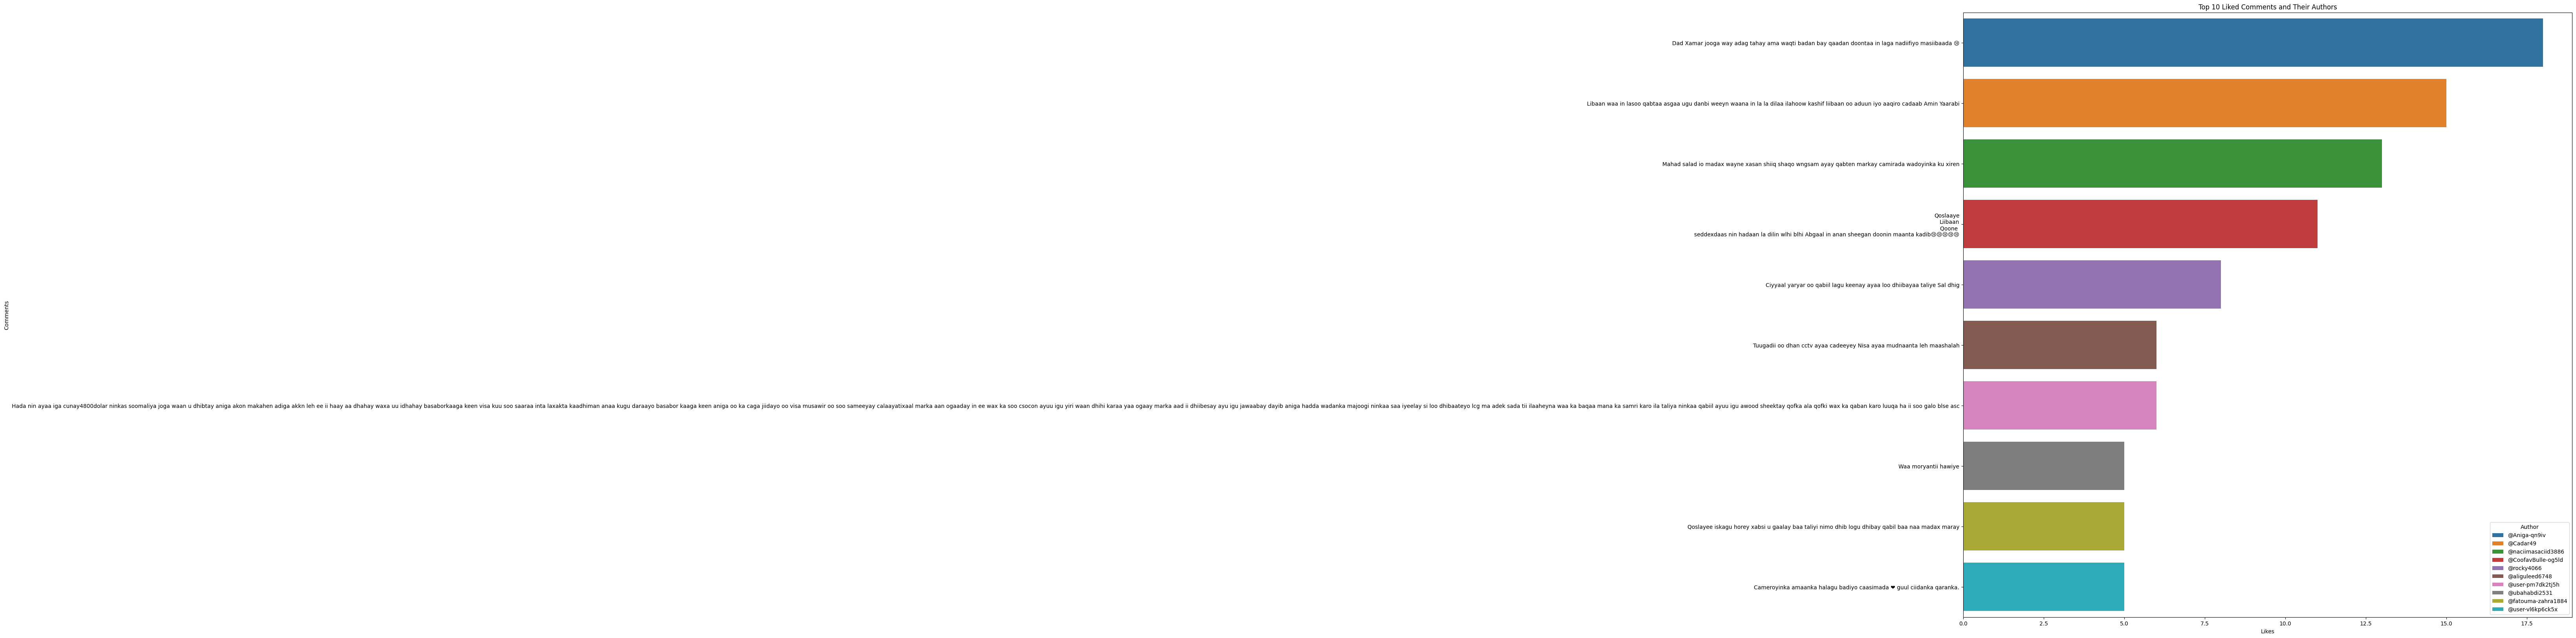

In [43]:
top_replies = df[['author', 'Comment', 'reply_count']].sort_values(by='reply_count', ascending=False).head(10)

plt.figure(figsize=(20, 20)) 
sns.barplot(x='reply_count', y='Comment', hue='author', dodge=False, data=top_replies)
plt.title('Top 10 Liked Comments and Their Authors')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.legend(title='Author', loc='lower right')
plt.show()

## Task 6


Let's analyze and visualize the top 5 users by number of posts (comments).

In [49]:
# checking the name of author column

df.columns

Index(['author', 'date', 'Comment', 'like_count', 'reply_count',
       'comment_length', 'word_count'],
      dtype='object')

In [50]:
# checking the number unique authors

df['author'].nunique()

1278

In [55]:
# checking the number of comments by the authors

top_authors = df['author'].value_counts().head(10)

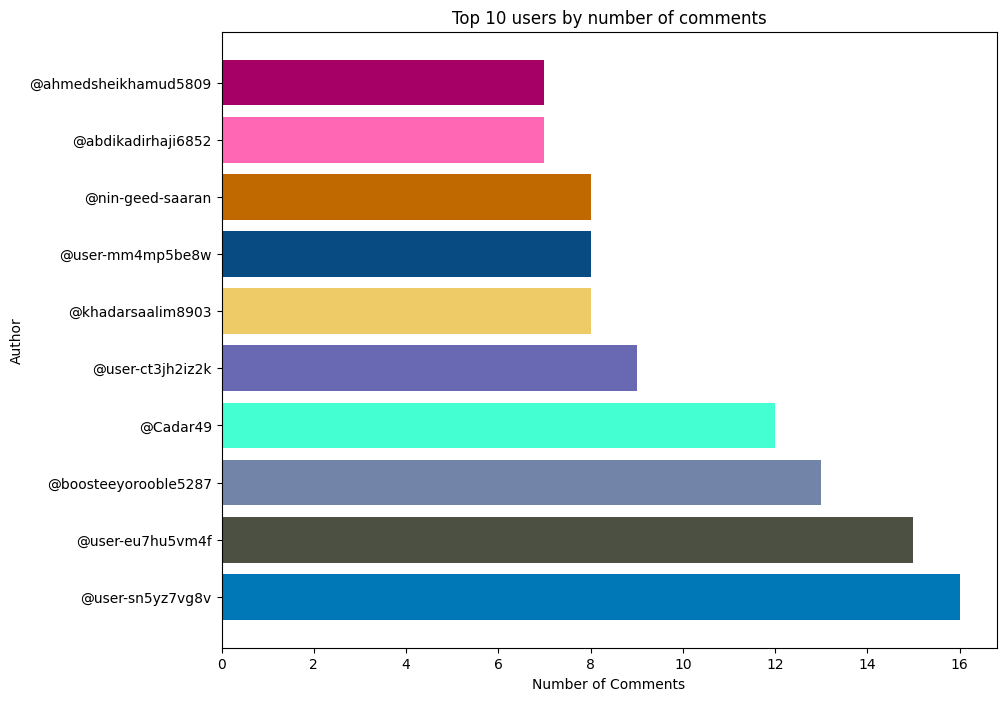

In [97]:
colors = ['#0077B6', '#4B5043', '#7284A8', '#44FFD1', '#6969B3', '#EFCB68', '#084B83', '#BF6900', '#FF66B3', '#A60067']

plt.figure(figsize=(10, 8)) 
plt.barh(top_authors.index, top_authors.values, color=colors)
plt.title('Top 10 users by number of comments')
plt.xlabel('Number of Comments')
plt.ylabel('Author')
plt.show()

## Task 7

Let's visualize the prevalent words in posts (comments) using WordCloud?

We will set some stopwords to remove common words and visualize the word cloud of the comments. These words may interfere with the trend; some stopwords might be the most prevalent. To avoid this, we will use stopwords so that we are left with the actual word

In [121]:
stopwords = {'Aamiin', 'Allah', 'dhan', 'Asc', 'a','U', 'u', 'dhan' 'aa', 'aad', 'aamiin', 'aan', 
'ah', 'aha', 'ahayn', 'alle', 'alx', 'ama', 'aniga', 'asaga', 'ay', 'aya', 
'ayaa', 'ayan', 'ayay', 'ayey', 'ayu', 'ayuu', 'ba', 'baa', 'bal', 'buu', 
'dabcan', 'dadka', 'dhammaan', 'dhinac', 'dhowr', 'e', 'ee', 'ey', 'ha', 
'haa', 'hada', 'hadaad', 'haddii', 'hadi', 'hadii', 'haduu', 'haka', 
'haku', 'hala', 'he', 'i', 'iga', 'ilaa', 'ilahow', 'in', 'inaad', 
'inay', 'iney', 'inta', 'inu', 'inuu', 'is', 'isaga', 'iska', 'isku', 
'iyo', 'ka', 'kaa', 'kale', 'kama', 'kan', 'ku', 'kugu', 'kulaha', 'kuma',
 'kuu', 'la', 'laga', 'lagu', 'laha', 'lahaa', 'lahayn', 'lama', 'leh', 'lkn', 
 'loo', 'ma', 'maa', 'mar', 'marka', 'markii', 'maxa', 'maxaa', 'maxay', 'may', 
 'meel', 'men', 'mid', 'mida', 'miya', 'miyaa', 'muu', 'muxuu', 'na', 'naga', 
 'nahay', 'nala', 'nambar', 'ninyohow', 'no', 'og', 'oo', 'qaba', 'qado',
  'qiyaas', 'qof', 'saas', 'sabab', 'sababta', 'sacad', 'sada', 'sadex', 
  'sagaal', 'sahal', 'salaam', 'sale', 'sama', 'san', 'sanad', 
  'sanadkii', 'sax', 'saxaafad', 'scw', 'se', 'sedex', 'sedexaad', 'shaqo', 'kuwaan', 'ayaan', 'wlhi',
  'sheeg', 'sheeko', 'si', 'si kastaba ha ahaatee', 'sida', 'sidaa', 'sidan', 
  'sidii', 'siduu', 'sii', 'siin', 'siiya', 'siiyay', 'siiyo', 'sikastaba', 'siman', 
   'so', 'socon', 'sodon', 'soo', 'soojeedin', 'sow', 'sug', 'sugan', 
  'sugay', 'sugnaan', 'suuragal', 'suurtogal', 'tag', 'tagay', 'tago', 'tahay', 
  'tashan', 'teg', 'tegay', 'tii', 'tiisa', 'tirada', 'to', 'toban', 'todoba', 
  'toos', 'ugu', 'ugu danbeyntii', 'ugu horeyn', 'ugu yaraan','uu', 'wa', 'waa', 
  'waan', 'wada', 'war', 'warka', 'wax', 'waxa', 'waxaa', 
   'waxaan', 'waxan', 'waxay', 'way', 'waye', 'weli', 'wixii', 'wll', 'wuu', 
   'wuxu', 'wuxuu', 'xiiso', 'xil', 'xiriir', 'yaa', 'yaab', 'yaala', 'yahay', 'ahaa', 'dowlada', 'dalka',
    'yimid', 'yiraahdo', 'yiri', 'xamar', 'dad', 'nin', 'ninka','badan', 'allaha', 'Somalia', 'waliba', 'wlh', 'walba', 'muqdisho'}

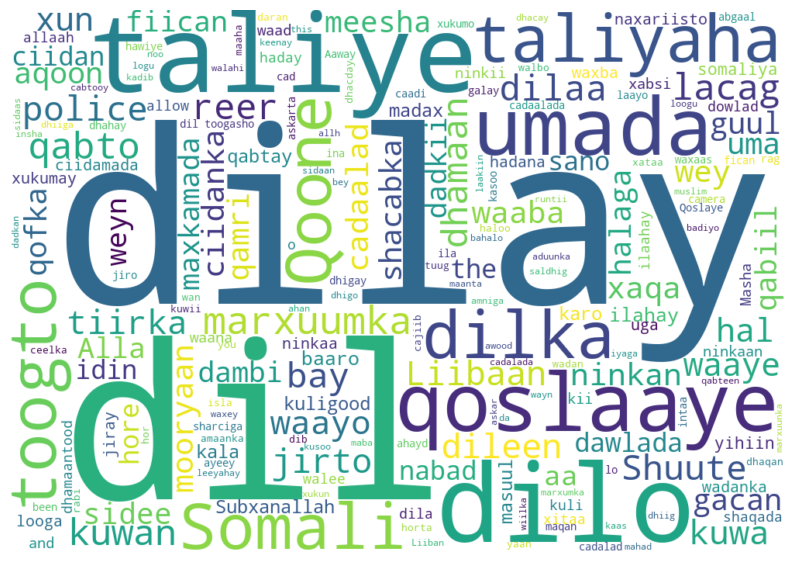

In [124]:
# Word cloud for comments

text = ' '.join(comment for comment in df.Comment)
stopwords = set(stopwords)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1000, height=700,
            min_font_size = 10).generate(text) 

plt.figure(figsize=(10, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Task 8

 Let’s visualize in what STATE/COUNTRY were the top posts posted that mention your TOPICT.
 
 This task can't be done beacuse YouTube data does not contain users Location.

## Task 9 

Let’s visualize on what day(s) of the month was your TOPIC talked about the most on the selected social media platform.

In [81]:
# Converting the 'date' column to datetime

df['date'] = pd.to_datetime(df['date'])

In [83]:
# checking the data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1836 entries, 0 to 1836
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   author          1836 non-null   object             
 1   date            1836 non-null   datetime64[ns, UTC]
 2   Comment         1836 non-null   object             
 3   like_count      1836 non-null   int64              
 4   reply_count     1836 non-null   int64              
 5   comment_length  1836 non-null   int64              
 6   word_count      1836 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(2)
memory usage: 114.8+ KB


In [84]:
# getting the year, month and day of the week
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [92]:
# creating a new column with the month name
df['month_name'] = df['date'].dt.month_name()

In [85]:
# grouping by comments by dat
day = df.groupby('day')['Comment'].count()

In [86]:
day

day
4     385
5     312
6     199
7     132
8      60
9     375
10    339
11     34
Name: Comment, dtype: int64

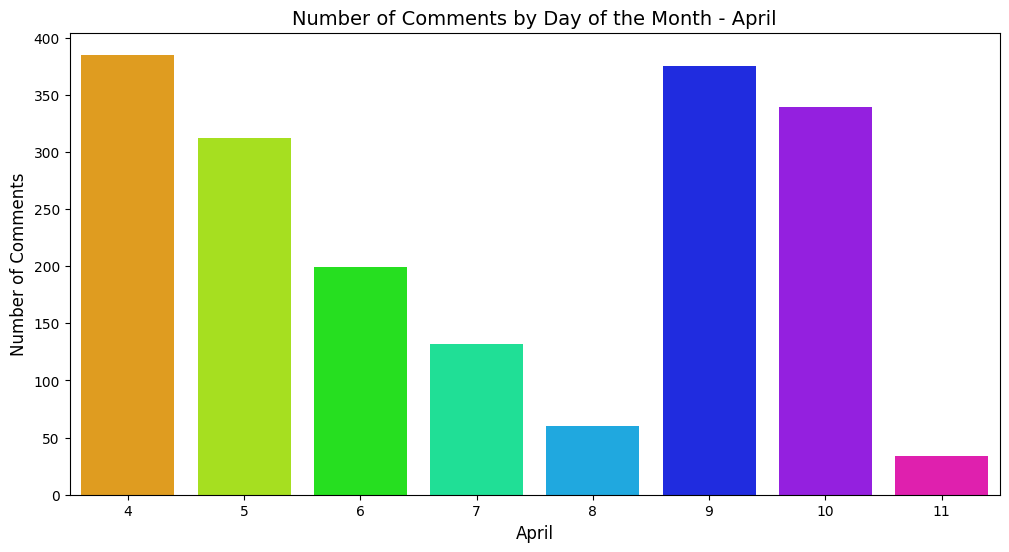

In [125]:
# Getting the name of the current month
current_month = df['month_name'].iloc[0]

plt.figure(figsize=(12, 6))
sns.barplot(x=day.index, y=day.values, palette='hsv') 
plt.title(f'Number of Comments by Day of the Month - {current_month}', fontsize=14)
plt.xlabel('April', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)
plt.xticks(rotation=0)
plt.show()

## Task 10

In [6]:
Sentiments = pd.read_csv('Sentiment.csv')
Sentiments

,Unnamed: 0,Statements,Label
0,0,Guul,1
1,1,Hambalyp,1
2,2,amaan,1
3,3,soo jiidasho leh,1
4,4,raali galin,1
...,...,...,...
3411,3412,Ey ey dhalay,3
3412,3413,Mooryaan,3
3413,3414,Shuute,2
3414,3415,Dilaaga,3


In [7]:
# checking for missing values
Sentiments.isna().sum()

Unnamed: 0    0
Statements    0
Label         0
dtype: int64

In [8]:
Sentiments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3416 non-null   int64 
 1   Statements  3416 non-null   object
 2   Label       3416 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 80.2+ KB


In [9]:
 def remove_punctuation(text):
    return "".join([t for t in text if t not in string.punctuation])

In [10]:
def words_with_more_than_three_chars(text):
    return " ".join([t for t in text.split() if len(t)>3])

In [11]:
import string

def remove_punctuation(x):
    # Check if x is a string instance
    if isinstance(x, str):
        # If x is a string, remove punctuation
        return x.translate(str.maketrans('', '', string.punctuation))
    else:
        # If x is not a string (e.g., NaN or a number), return it unchanged
        return x

# Assuming Sentiments is your DataFrame and 'Statement' is a column in it
Sentiments['Statements'] = Sentiments['Statements'].apply(lambda x: remove_punctuation(x))

# Display the first 10 rows of the DataFrame
Sentiments.head(10)

,Unnamed: 0,Statements,Label
0,0,Guul,1
1,1,Hambalyp,1
2,2,amaan,1
3,3,soo jiidasho leh,1
4,4,raali galin,1
5,5,Legend,1
6,6,faraxad,1
7,7,qurux,1
8,8,quruxsan,1
9,9,la jecel yahay,1


In [12]:
# Converting non-string values to strings
Sentiments['Statements'] = Sentiments['Statements'].astype(str)

In [13]:
Sentiments['Statements']=Sentiments['Statements'].apply(lambda x:remove_punctuation(x))
Sentiments['Statements']=Sentiments['Statements'].apply(lambda x:words_with_more_than_three_chars(x))
Sentiments['Statements']=Sentiments['Statements'].apply(lambda x: ' '.join([word for word in x.split()]))

In [14]:
Sentiments['Sentiments'] = Sentiments['Label'].map({1:'Wanaag',2:'Dhexdhexaad',3:'Xumaan'})
Sentiments.tail()

,Unnamed: 0,Statements,Label,Sentiments
3411,3412,dhalay,3,Xumaan
3412,3413,Mooryaan,3,Xumaan
3413,3414,Shuute,2,Dhexdhexaad
3414,3415,Dilaaga,3,Xumaan
3415,3416,,1,Wanaag


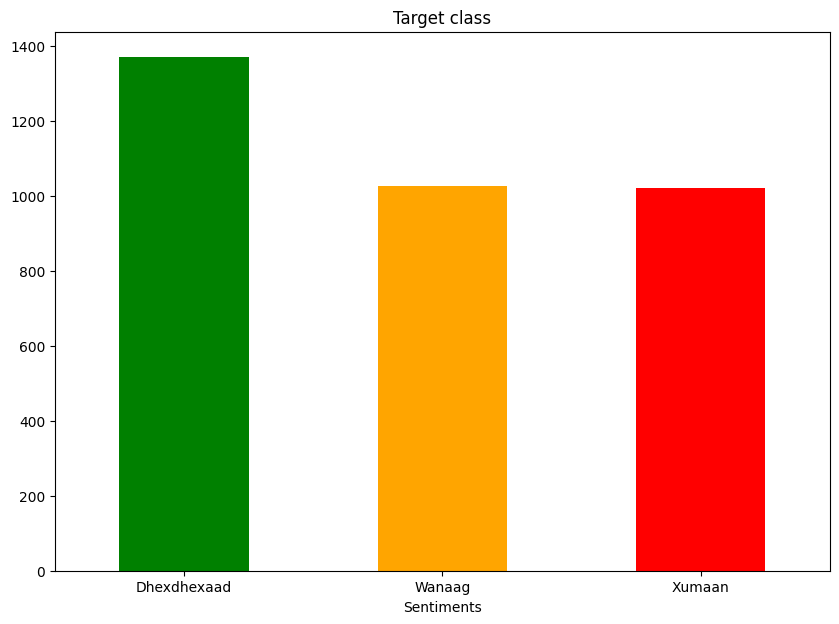

In [15]:
# Define color mapping
color_dict = {'Wanaag': 'green', 'Xumaan': 'red', 'Dhexdhexaad': 'orange'}

# Create a list of colors for the bars
bar_colors = [color_dict[sentiment] for sentiment in Sentiments['Sentiments'].unique()]

Sentiments.groupby('Sentiments')['Sentiments'].count().plot(kind='bar', color=bar_colors, title='Target class', figsize=(10,7))
plt.xticks(rotation=0)
plt.show()

In [139]:
# Converting  stop_words_to_lower to a set for faster membership testing
stop_words_set = set(stopwords)

# Defining a function to clean and process each comment

def process_comment(comment):
    review = re.sub('[^a-zA-Z]', ' ', str(comment))
    review = review.lower().split()
    review = [word for word in review if word not in stop_words_set]
    return ' '.join(review)

# Applying the function to each comment in the DataFrame
Sentiments['ProcessedStatement'] = Sentiments['Statements'].apply(process_comment)

In [140]:
# Checking the data
Sentiments.head()

,Unnamed: 0,Statements,Label,Sentiments,ProcessedStatement
0,0,Guul,1,Wanaag,guul
1,1,Hambalyp,1,Wanaag,hambalyp
2,2,amaan,1,Wanaag,amaan
3,3,jiidasho,1,Wanaag,jiidasho
4,4,raali galin,1,Wanaag,raali galin


## Task 11

Let’s train a sentiment analysis model using machine learning

In [141]:
X = Sentiments['ProcessedStatement']  # The column containing text data
y =  Sentiments['Sentiments']  # The column containing sentiment labels

In [142]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
# Defining a machine learning pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True)),
    ('classifier', LogisticRegression(random_state=42)),
])

In [144]:
# Training the model with the corrected data

pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', LogisticRegression(random_state=42))])

Let's test the model

In [148]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy*100
accuracy_percent

81.28654970760235

## Task 12

Let’s now apply the trained model on the selected topic textual contents in order to predict their sentiments

In [153]:
predicted_sentiments = pipeline.predict(df['ProcessedComment'])
df['Predicted Sentiment'] = predicted_sentiments

In [154]:
# Applying the trained model to predict sentiments of the selected topic textual contents
predicted_sentiments = pipeline.predict(df['ProcessedComment'])

# Add the predictions to the original dataframe for review
df['Predicted Sentiment'] = predicted_sentiments

# Displaying the original comments with their predicted sentiments
print(df[['ProcessedComment', 'ProcessedComment']].head())

                                    ProcessedComment  \
0                 tareenka qoslaaye aqoon shaqadiisa   
1                qareenka qoslaaye shaqadiisa yaqaan   
2  midib dal muslim dhulka katagaayo subxanallah ...   
3  kiiskaan madmadow jira gacanta cida gaysatay c...   
4           iimaanka qaad qoslaaye mahi dhaho hartay   

                                    ProcessedComment  
0                 tareenka qoslaaye aqoon shaqadiisa  
1                qareenka qoslaaye shaqadiisa yaqaan  
2  midib dal muslim dhulka katagaayo subxanallah ...  
3  kiiskaan madmadow jira gacanta cida gaysatay c...  
4           iimaanka qaad qoslaaye mahi dhaho hartay  


## Task 13

Let’s visualize the sentiment percentages (positive, negative, neutral) for the selected topic

In [155]:
# Calculating sentiment distribution in the predicted sentiments
predicted_sentiments_distribution = df['Predicted Sentiment'].value_counts(normalize=True) * 100
predicted_sentiments_distribution

Predicted Sentiment
Xumaan         53.812636
Wanaag         42.047930
Dhexdhexaad     4.139434
Name: proportion, dtype: float64

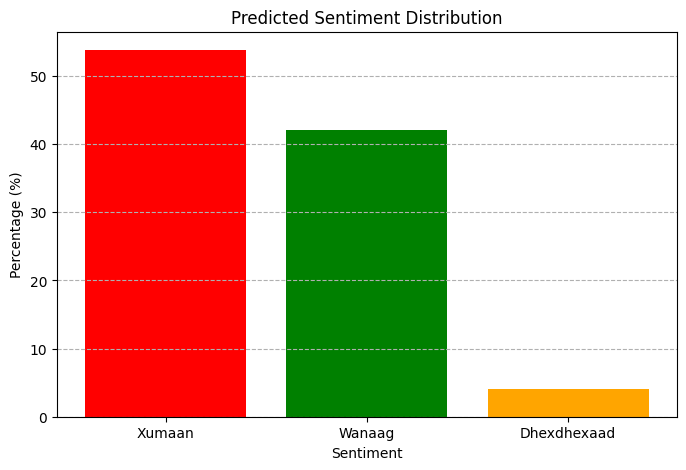

In [159]:
# Define color mapping
color_dict = {'Wanaag': 'green', 'Xumaan': 'red', 'Dhexdhexaad': 'orange'}

# Create a list of colors for the bars
bar_colors = [color_dict[sentiment] for sentiment in predicted_sentiments_distribution.index]

plt.figure(figsize=(8, 5))
plt.bar(predicted_sentiments_distribution.index, predicted_sentiments_distribution.values, color=bar_colors)
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

## Task 14 

Let’s visualize the top positive keywords associated with the selected topic

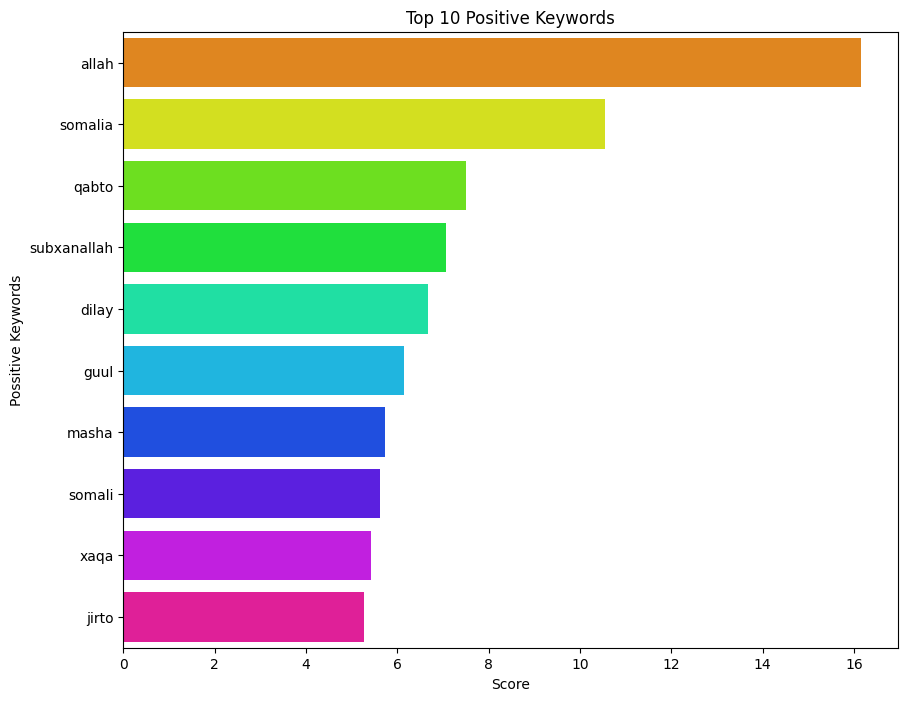

In [165]:

# Filter the dataset for comments predicted as positive
positive_comments = df[df['Predicted Sentiment'] == 'Wanaag']['ProcessedComment']

# Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')  # Adjust or remove stop_words as necessary
tfidf_matrix = tfidf_vectorizer.fit_transform(positive_comments)

# Get feature names and tfidf scores
feature_names = tfidf_vectorizer.get_feature_names_out()
scores = np.asarray(tfidf_matrix.sum(axis=0)).ravel()
tfidf_scores = dict(zip(feature_names, scores))

# Sort the scores in descending order
sorted_tfidf_scores = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)

# Convert to DataFrame for easy handling and visualization
df_tfidf_scores = pd.DataFrame(sorted_tfidf_scores, columns=['Term', 'Score']).head(10) 

# Visualization
plt.figure(figsize=(10, 8))
sns.barplot(y=df_tfidf_scores['Term'], x=df_tfidf_scores['Score'], palette='hsv', orient='h')
plt.xlabel('Score')
plt.ylabel('Possitive Keywords')
plt.title('Top 10 Positive Keywords')
plt.show()

## Task 15

Let’s visualize the top negative keywords associated with the selected topic

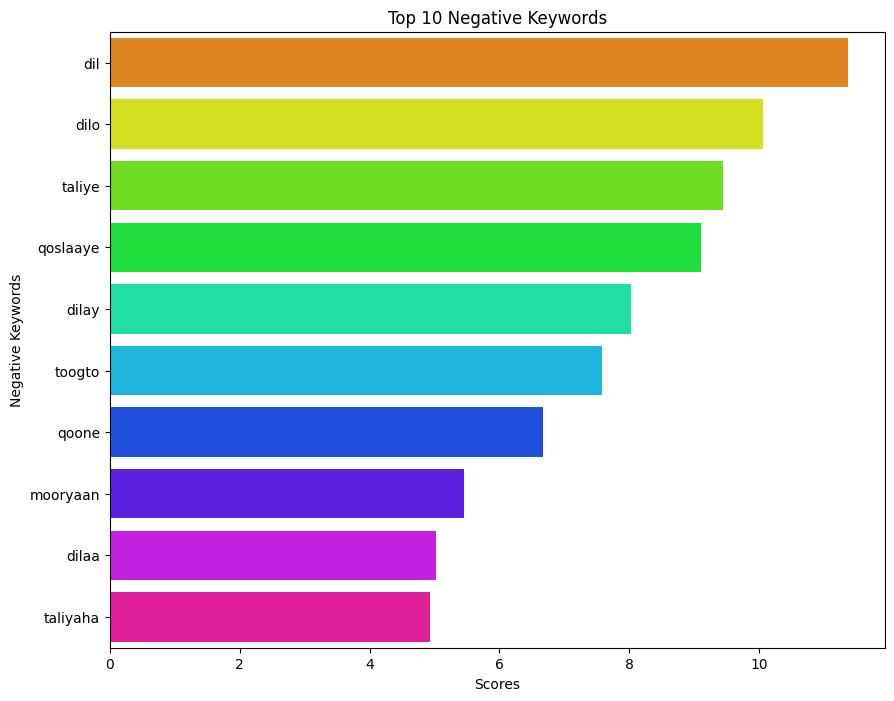

In [166]:
# Filter the dataset for comments predicted as positive
positive_comments = df[df['Predicted Sentiment'] == 'Xumaan']['ProcessedComment']

# Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')  # Adjust or remove stop_words as necessary
tfidf_matrix = tfidf_vectorizer.fit_transform(positive_comments)

# Get feature names and tfidf scores
feature_names = tfidf_vectorizer.get_feature_names_out()
scores = np.asarray(tfidf_matrix.sum(axis=0)).ravel()
tfidf_scores = dict(zip(feature_names, scores))

# Sort the scores in descending order
sorted_tfidf_scores = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)

# Convert to DataFrame for easy handling and visualization
df_tfidf_scores = pd.DataFrame(sorted_tfidf_scores, columns=['Term', 'Score']).head(10) 

# Visualization
plt.figure(figsize=(10, 8))
sns.barplot(y=df_tfidf_scores['Term'], x=df_tfidf_scores['Score'], palette='hsv', orient='h')
plt.xlabel('Scores')
plt.ylabel('Negative Keywords')
plt.title('Top 10 Negative Keywords')
plt.show()